In [102]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


In [103]:
# definimos lattice
xi, xf, N=-3,3,21
x = np.linspace(xi,xf,N)
y = x.copy()

In [104]:
X,Y = np.meshgrid(x,y)

In [105]:
#plt.scatter(X,Y)

In [106]:
def GetCharges(N=2):
    
    Q = np.zeros(N)
    r = np.zeros((N,2))
    
    Q[0] = 1
    Q[1] = -1
    
    r[0] = [0.05,0.1]
    r[1] = [0.05,-0.1]
    
    for i in range(N):
        r[i] = [ 2*np.cos(2*np.pi*i/N), 2*np.sin( 2*np.pi*i/N ) ]
        Q[i] = 1
        
        
    return Q,r

In [107]:
Q,rq=GetCharges(1000)

In [108]:
rq

array([[ 2.        ,  0.        ],
       [ 1.99996052,  0.01256629],
       [ 1.99984209,  0.02513208],
       ...,
       [ 1.9996447 , -0.03769688],
       [ 1.99984209, -0.02513208],
       [ 1.99996052, -0.01256629]])

In [109]:
def GetEx(x,y,xi,yi,q=1):
    
    d = (x-xi)**2 + (y-yi)**2
    
    return q*(x-xi)/d**(3/2)

In [110]:
def GetEy(x,y,xi,yi,q=1):
    
    d = (x-xi)**2 + (y-yi)**2
    
    return q*(y-yi)/d**(3/2)

In [111]:
def GetSum(x,y):
    
    Ex = 0.
    Ey = 0.
    
    for q in range(rq.shape[0]):
        Ex += GetEx(x,y,rq[q][0],rq[q][1],Q[q])
        Ey += GetEy(x,y,rq[q][0],rq[q][1],Q[q])
        
    return Ex,Ey

In [112]:
GetSum(0,0)

(1.1102230246251565e-14, -2.2874497435099173e-15)

In [113]:
def GetField(x,y):
    
    Ex = np.zeros((N,N))
    Ey = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            Ex[i,j],Ey[i,j]=GetSum(x[i],y[j])
        
    return Ex,Ey

In [114]:
Ex,Ey = GetField(x,y)

<IPython.core.display.Javascript object>


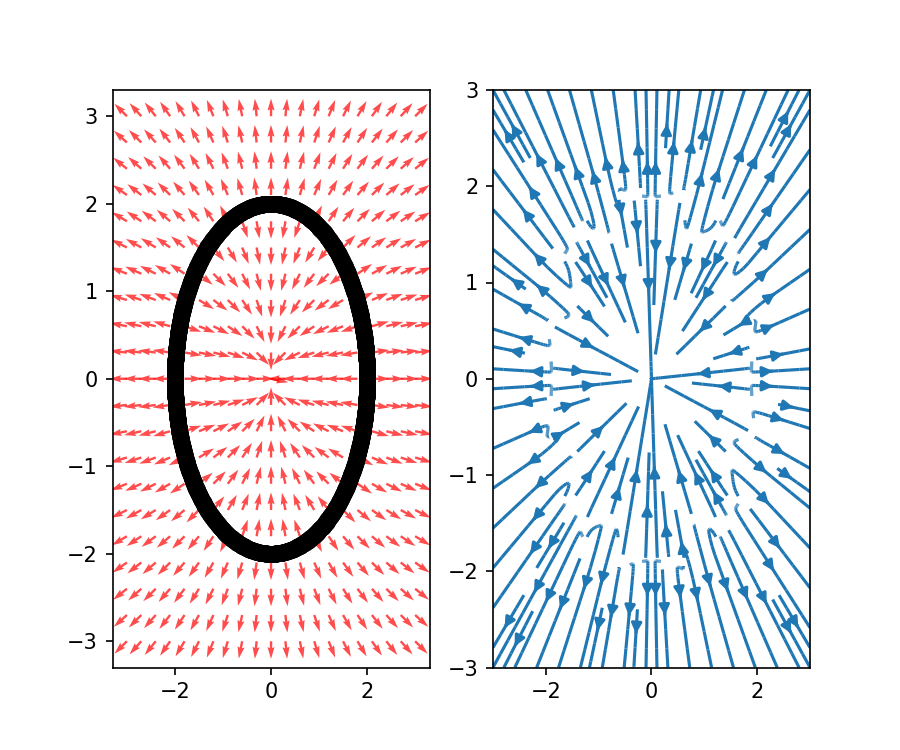

In [115]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,2,1)

for i in range(N):
    for j in range(N):
        ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j],color='r',alpha=0.7)
        
ax.scatter(rq[:,0],rq[:,1],color='k',s=50)

ax1 = fig.add_subplot(1,2,2)
ax1.streamplot(X,Y,Ex.T,Ey.T)